In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from sympy import *
sympy.init_printing()

Using TensorFlow backend.


In [2]:
x = symbols('x', real=True)

In [3]:
T = [Number(1), x]
for i in range(len(T), 8):
    T.append((2*x*T[i-1] - T[i-2]).simplify())
T

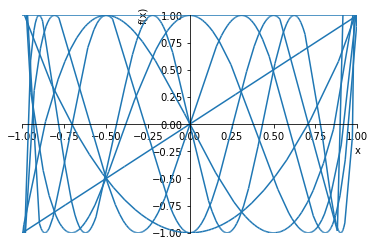

In [4]:
plot(*T, xlim=(-1,1), ylim=(-1,1))
plt.show()

In [5]:
class ChebyshevPolynormials(keras.layers.Layer):
    
    def __init__(self, degree, **kwargs):
        self.degree = degree
        super().__init__(**kwargs)
    
    def build(self, input_shape):
        self.coeff = self.add_weight(
            shape=(self.degree,),
            initializer='zeros', name='coeff')
        super().build(input_shape)
    
    def call(self, inputs):
        T = [K.ones_like(inputs)]
        if self.degree >= 2:
            T.append(inputs)
        for i in range(2, self.degree):
            T.append(2*inputs*T[i-1] - T[i-2])
        T = K.stack(T, axis=-1)
        forward = T * self.coeff
        forward = K.sum(forward, axis=-1)
        return forward

In [6]:
X = X_input = keras.layers.Input((1,))
X = ChebyshevPolynormials(8)(X)
M = keras.Model(X_input, X)
M.compile('sgd', 'mse')
M.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
chebyshev_polynormials_1 (Ch (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [7]:
X_train = np.linspace(-1, 1, num=10000)[:,np.newaxis]
Y_train = np.exp(X_train)

In [8]:
M.fit(X_train, Y_train, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 1s 130us/step - loss: 0.2217
Epoch 2/10
10000/10000 [==============================] - 0s 46us/step - loss: 0.0127
Epoch 3/10
10000/10000 [==============================] - 1s 57us/step - loss: 0.0029
Epoch 4/10
10000/10000 [==============================] - 0s 46us/step - loss: 7.0747e-04
Epoch 5/10
10000/10000 [==============================] - 0s 48us/step - loss: 1.7510e-04
Epoch 6/10
10000/10000 [==============================] - 1s 50us/step - loss: 4.3972e-05
Epoch 7/10
10000/10000 [==============================] - 1s 51us/step - loss: 1.1250e-05
Epoch 8/10
10000/10000 [==============================] - 0s 45us/step - loss: 2.9031e-06
Epoch 9/10
10000/10000 [==============================] - 1s 55us/step - loss: 7.5365e-07
Epoch 10/10
10000/10000 [==============================] - 0s 45us/step - loss: 1.9626e-07


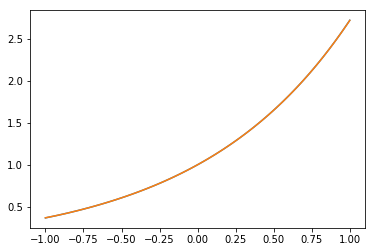

In [9]:
plt.plot(X_train, Y_train)
plt.plot(X_train, M.predict(X_train))
plt.show()